# QPong and PICO-8

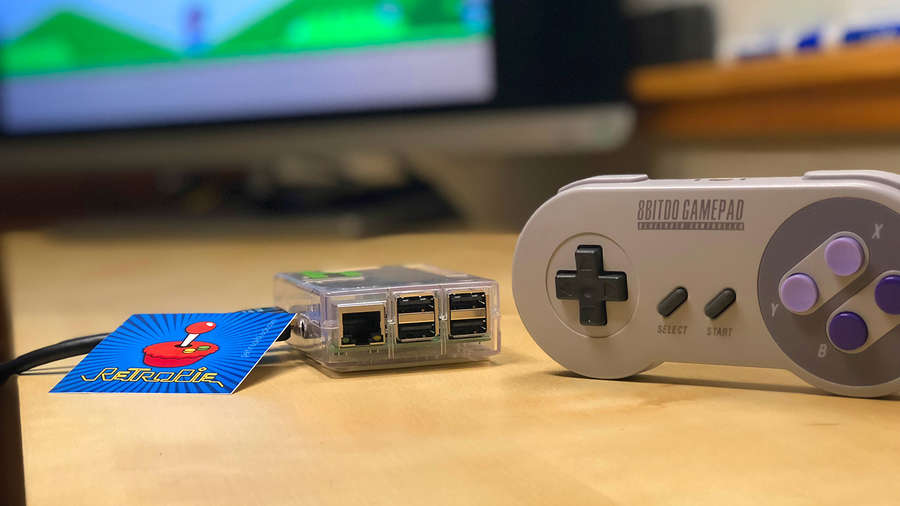

## Introduction

Quantum computer operating in superconducting qubits can go to the temperature of nearly absolute 0 degree Kelvin. It takes a huge operating cost to build and maintain its superpower. Unless you are a scientist or an engineer in an advacned reseach group or a big company like IBM, Google, Microsoft, you cannot have a taste of what it's going on physically. It would be wonderful if you could run it on your hands. Have you ever thought having a simulated quantum computer to play the most weried game in world? Here is tutorial to make one. Let's turn a Retro Pi into a quantum computer to play PICO-8 game.

## Procedure

Before installation, you need to have a PICO-8 account and pay for lexaloffle to acquire the suitable game software, we want the Raspberry Pi one. 

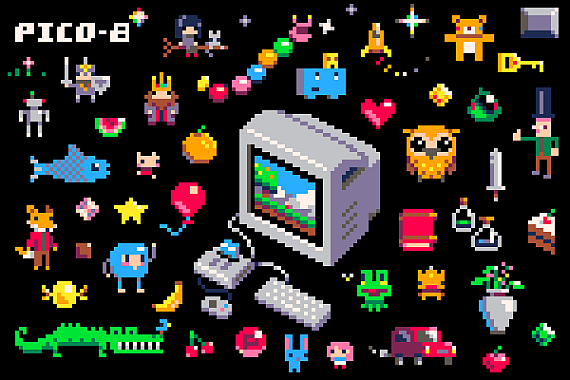

https://www.lexaloffle.com/pico-8.php

Write the image to the SD card. I have a Mac laptop and I used the command line to do this, as follows:

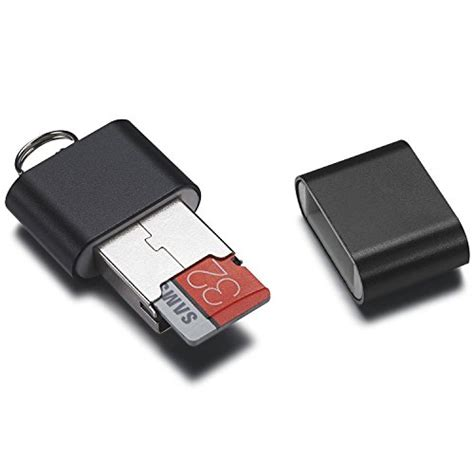

Determine which disk device (e.g. "disk2") is the SD card.

`diskutil list`

Unmount the SD card, substituting "disk2" with your actual device name.

`diskutil unmountDisk /dev/disk2`

You may download the retropie image here: 

https://retropie.org.uk/download/

Write the image to the SD card, substituting "rdisk2" with your actual device name with a "r" in front of it ("rdisk" instead of "disk"). This command can take a while. (You need to change the name of the appropriate version).



`sudo dd bs=1m if=retropie-v3.8.1-rpi2_rpi3.img of=/dev/rdisk2`

With the SD card still connected to the laptop, edit "/boot/config.txt" (accessible on the Mac as "/Volumes/boot/config.txt"). Uncomment this line so that Picade's screen will work correctly:

`hdmi_force_hotplug=1`

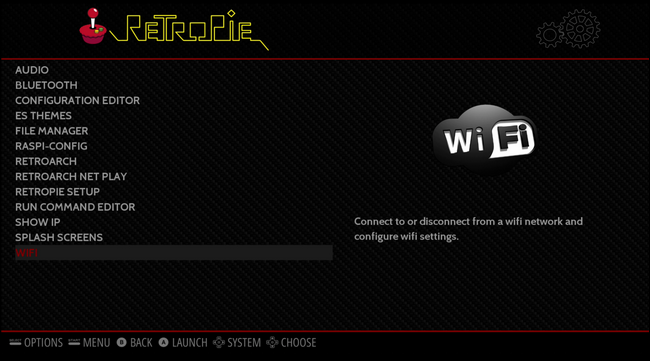

Unmount the SD card then remove it from your computer. Put the SD card in the Pi, hook it all up, and supply power. It should boot to Emulation Station and let you set up the button bindings.

From Emulation Station, go into the RetroPie menu and set up wifi. You'll need a keyboard connected to the Pi to enter your wifi SSID and password.

(If you cannot connect to the router, check the firewall. Still not, try your mobile phone as the hotspot. Still not, I advise you to flash the SD card and start all the things over.)

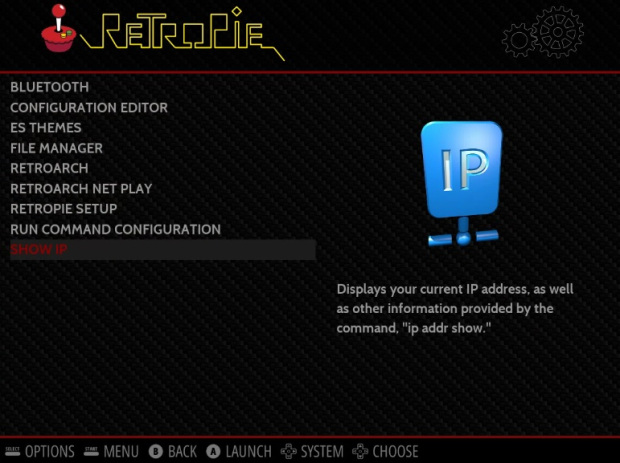

Once wifi is set up, select "show IP" from the RetroPie menu. You can use this IP address to connect to the Pi over the wireless network, transfer files, and make config changes. To get to a remote shell from your laptop, use the "ssh" command, substituting your IP address, and enter a password of "raspberry":

`ssh pi@ip address (e.g., 10.1.10.7)`

For doing the following process, I like 3 screen displays, puting the terminal to the main monitor, this tutorial to the extended screen from iPad, and another extended screen connected to the Raspberry Pi. You may dowload a software called SpaceDesk for your convenience.
https://spacedesk.net/

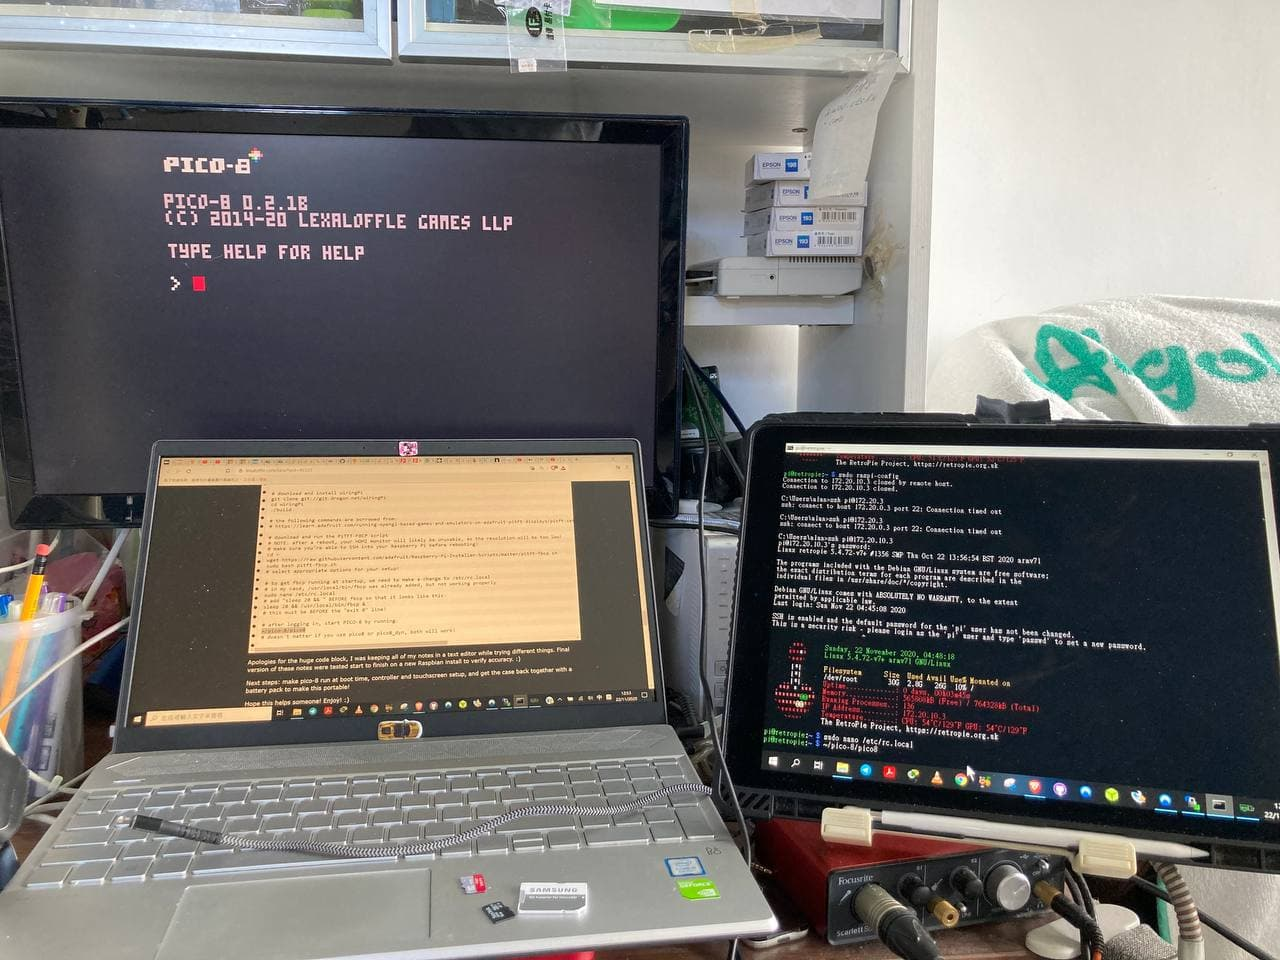

#### Update the system

`sudo apt-get update`

`sudo apt-get upgrade`

From another host, transfer the file `PICO-8 v0.1.11` binaries downloaded from the offiical website to the Raspberry Pi.
Be aware of the name of the file match that yours. 

`scp pico-8_0.1.11_raspi.zip pi@raspberrypi:~/`

#### unpack the PICO-8 binaries

`unzip pico-8_0.1.11_raspi.zip`

Reboot the Pi:

`sudo shutdown -r now`

On the Picade with a keyboard connected, exit Emulation Station (Menu button, Quit, Quit Emulation Station) to get a shell prompt, then run the pico8 command:

`~/pico-8/pico8 -splore`

If you cannot open Pico-8, try the following:

the following commands are borrowed from:

https://solarianprogrammer.com/2015/01/22/raspberry-pi-raspbian-getting-started-sdl-2/

#### download SDL2 source

wget https://www.libsdl.org/release/SDL2-2.0.7.tar.gz

#### unpack SDL2 source

`tar zxvf SDL2-2.0.7.tar.gz`

#### install dependencies

`sudo apt-get install build-essential libfreeimage-dev libopenal-dev libpango1.0-dev libsndfile-dev libudev-dev libasound2-dev libjpeg-dev libtiff5-dev libwebp-dev automake git-core`

#### build SDL2

`cd SDL2-2.0.7`

#### configure SDL2
NOTE: this is for Raspberry Pi versions 2 and 3 (NOT TESTED):

`./configure --host=armv7l-raspberry-linux-gnueabihf --disable-pulseaudio --disable-esd --disable-video-mir --disable-video-wayland --disable-video-x11 --disable-video-opengl`

if there were no issues, build and install the binaries
this will take a while, play some PICO-8 BBS cartridges while you wait ;)

`make -j 4`

`sudo make install`

#### download and install wiringPi

`sudo apt-get install wiringpi`

download and run the PiTFT-FBCP script
NOTE: after a reboot, your HDMI monitor will likely be unusable, as the resolution will be too low!
make sure you're able to SSH into your Raspberry Pi before rebooting!

`cd ~`

`wget https://raw.githubusercontent.com/adafruit/Raspberry-Pi-Installer-Scripts/master/pitft-fbcp.sh`

`sudo bash pitft-fbcp.sh`

select appropriate options for your setup! For me, I just select 1.

After the reboot, you need to reconnect the raspberry pi with the mac or pc. You may see that the resolution of your raspberry pi is incompatible to your monitor(if it is not big enough!). Now you need to open up the raspi-config tool by running the terminal command.

`sudo raspi-config`

Choose the Resolution.
Then choose CEA Mode 31 1920x1080 50Hz 16:9. Click Yes to reboot.

To get fbcp running at startup, we need to make a change to /etc/rc.local

`sudo nano /etc/rc.local`

Add "sleep 20 && " BEFORE fbcp so that it looks like this:
this must be BEFORE the "exit 0" line!

`sleep 20 && /usr/local/bin/fbcp &`

After logging in, start PICO-8 by running:

`~/pico-8/pico8`

That's all for this tutorial and all you need! I hope you everything work fine. It's just for the basic setup. You can implement more elements and feature for later development. 

For autorun, you may try to type the following to command to the prompt, then program start at the beginining.

`sudo crontab -e`

`@reboot ~/pico-8/pico8 -splore`

From the game, you need to seach for QPONG online and that's the main page. 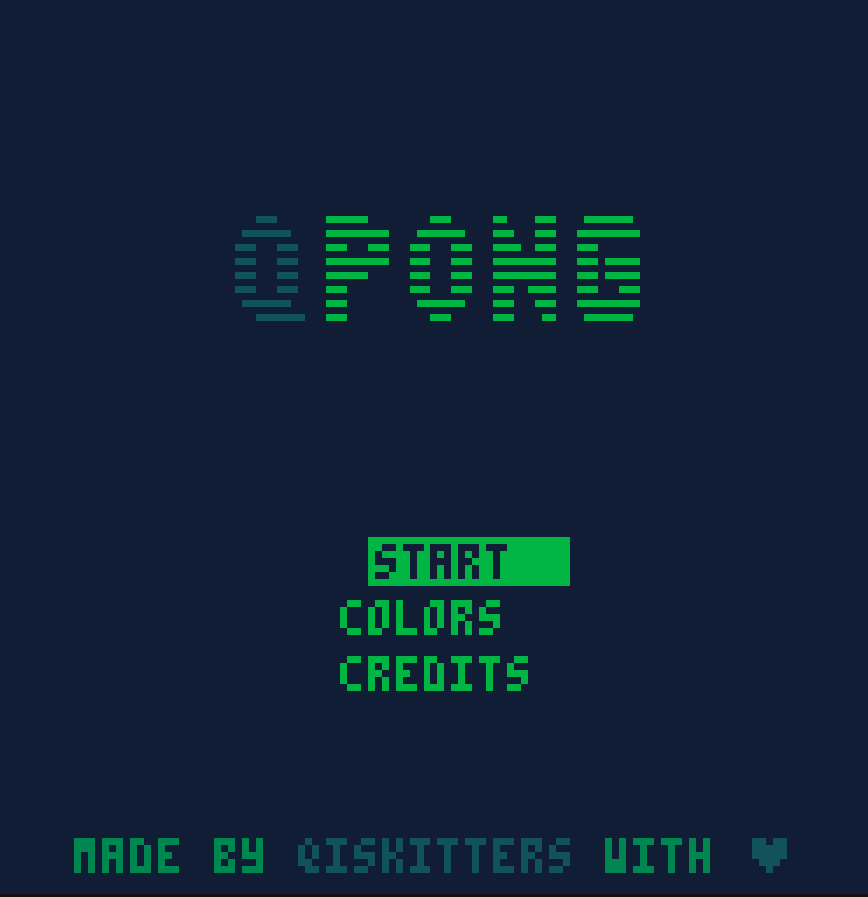

Click start and you will meed to press `X` or `H` to insert X-gate and H-gate correspondingly.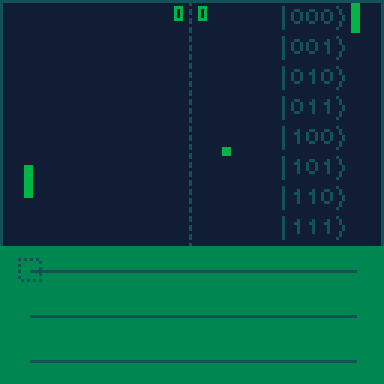

If we can win the game, the below message will appear.

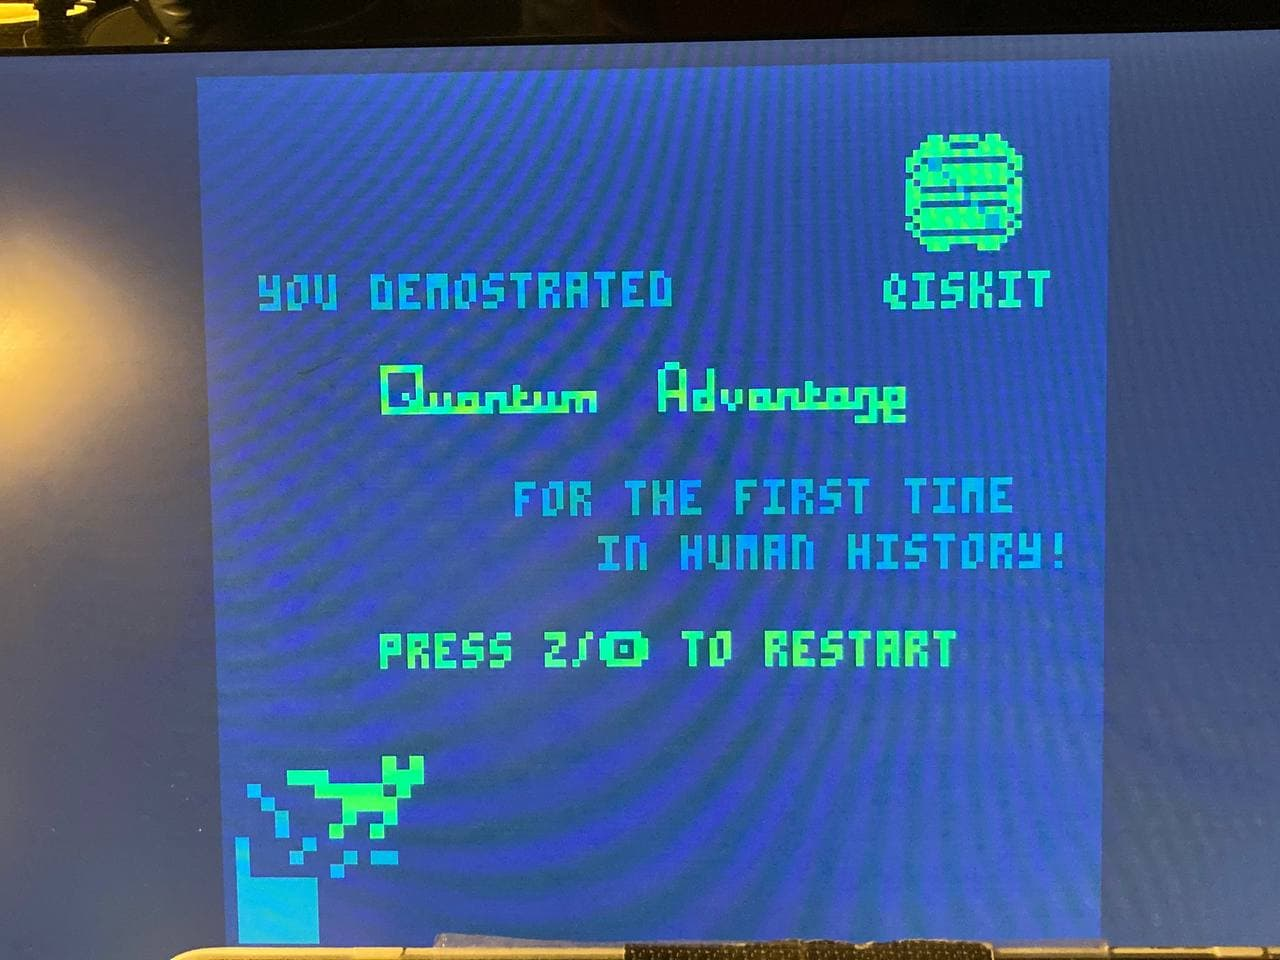

# Reference:
1. https://www.lexaloffle.com/bbs/?tid=3935
2. http://wiringpi.com/download-and-install/
3. https://pimylifeup.com/raspberry-pi-screen-resolution/
4. http://45.56.87.11/bbs/?page=2&tid=3085
5. https://www.lexaloffle.com/bbs/?pid=45533
6. https://www.pishop.us/raspberry-pi-projects/retropie-quick-start-guide/
7. https://pimylifeup.com/raspberry-pi-screen-resolution/
8. https://www.raspberrypi.org/documentation/configuration/hdmi-config.md
9. https://www.raspberrypi.org/blog/how-to-run-a-script-at-start-up-on-a-raspberry-pi-using-crontab/